In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore") 
from scipy.stats import ttest_1samp, ttest_ind
my_colors = ['#d3d3d3','#d1a163','#7a7a7a','#d4a07d','#ffbf65','#202020']
background_color = '#f6f5f5'

In [2]:
df=pd.read_csv("Wholesale Customer.csv")
df1=pd.read_csv("Survey-1.csv")
df2=pd.read_csv("A & B shingles-1.csv")


In [3]:
#1

In [4]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [5]:
df['Total']=df.iloc[:,3:].sum(axis=1)
dfa=df.copy()
df_og=dfa.iloc[:,3:]
df_og
dfb=df.copy()
dfb.drop('Buyer/Spender',axis=1,inplace=True)
dfb.drop('Total',axis=1,inplace=True)
dfb

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [6]:
df_og.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [7]:
df.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
 9   Total             440 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 34.5+ KB


In [9]:
df.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen', 'Total'],
      dtype='object')

In [10]:
df.Region.unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [11]:
df.Channel.unique()

array(['Retail', 'Hotel'], dtype=object)

In [12]:
df.Region.value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [13]:
df.Channel.value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [14]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


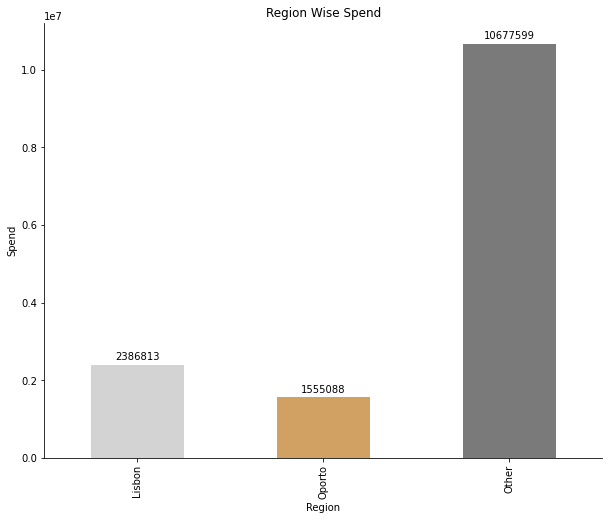

In [15]:
plt.figure(figsize=(10,8))
Reg_plot=df.groupby('Region').sum()['Total'].plot(kind='bar',color=my_colors)
plt.ylabel("Spend")
plt.title("Region Wise Spend")
for bar in Reg_plot.patches:
            Reg_plot.annotate(format(bar.get_height(),'.0f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=10,xytext=(0,8),textcoords='offset pixels')
            Reg_plot.spines['top'].set_visible(False)
            Reg_plot.spines['right'].set_visible(False)

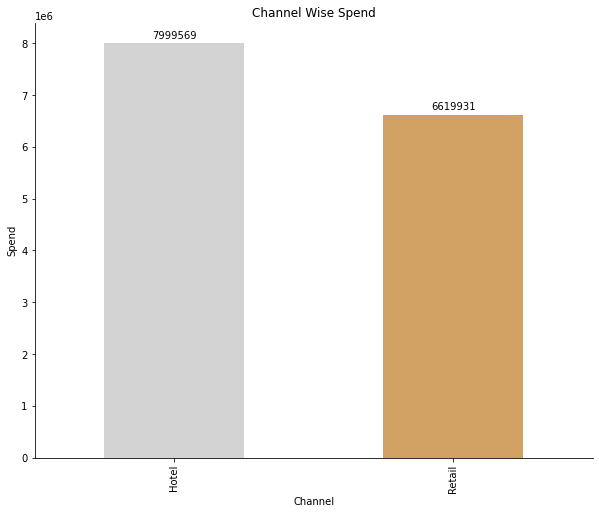

In [16]:
plt.figure(figsize=(10,8))
Channel_plot=df.groupby('Channel').sum()['Total'].plot(kind='bar',color=my_colors)
plt.ylabel("Spend")
plt.title("Channel Wise Spend")
for bar in Channel_plot.patches:
            Channel_plot.annotate(format(bar.get_height(),'.0f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=10,xytext=(0,8),textcoords='offset pixels')
            Channel_plot.spines['top'].set_visible(False)
            Channel_plot.spines['right'].set_visible(False)


In [17]:
Region_wise=df.groupby('Region').sum().round(2)
Region_wise['Total']=Region_wise.iloc[0:,:].sum(axis=1)
Total_spending=Region_wise['Total'].sum(axis=0)
Region_wise['Proportion']=(Region_wise.Total/Total_spending*100).round(2)
Region_wise

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total,Proportion
Region,,,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327,4791721,16.33
Oporto,14899,464721,239144,433274,190132,173311,54506,3125075,10.65
Other,64026,3960577,1888759,2495251,930492,890410,512110,21419224,73.01


In [18]:
Channel_wise=df.groupby('Channel').sum().round(2)
Channel_wise['Total']=Channel_wise.iloc[0:,:].sum(axis=1)
Total_spending=Channel_wise['Total'].sum(axis=0)
Channel_wise['Proportion']=(Channel_wise.Total/Total_spending*100).round(2)
Channel_wise

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total,Proportion
Channel,,,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,16070172,54.78
Retail,25986,1264414,1521743,2317845,234671,1032270,248988,13265848,45.22


In [19]:
dfb.groupby('Region').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
Oporto,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
Other,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


In [20]:
dfb.groupby('Channel').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
Retail,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


In [21]:
df_og.std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
Total               26356.301730
dtype: float64

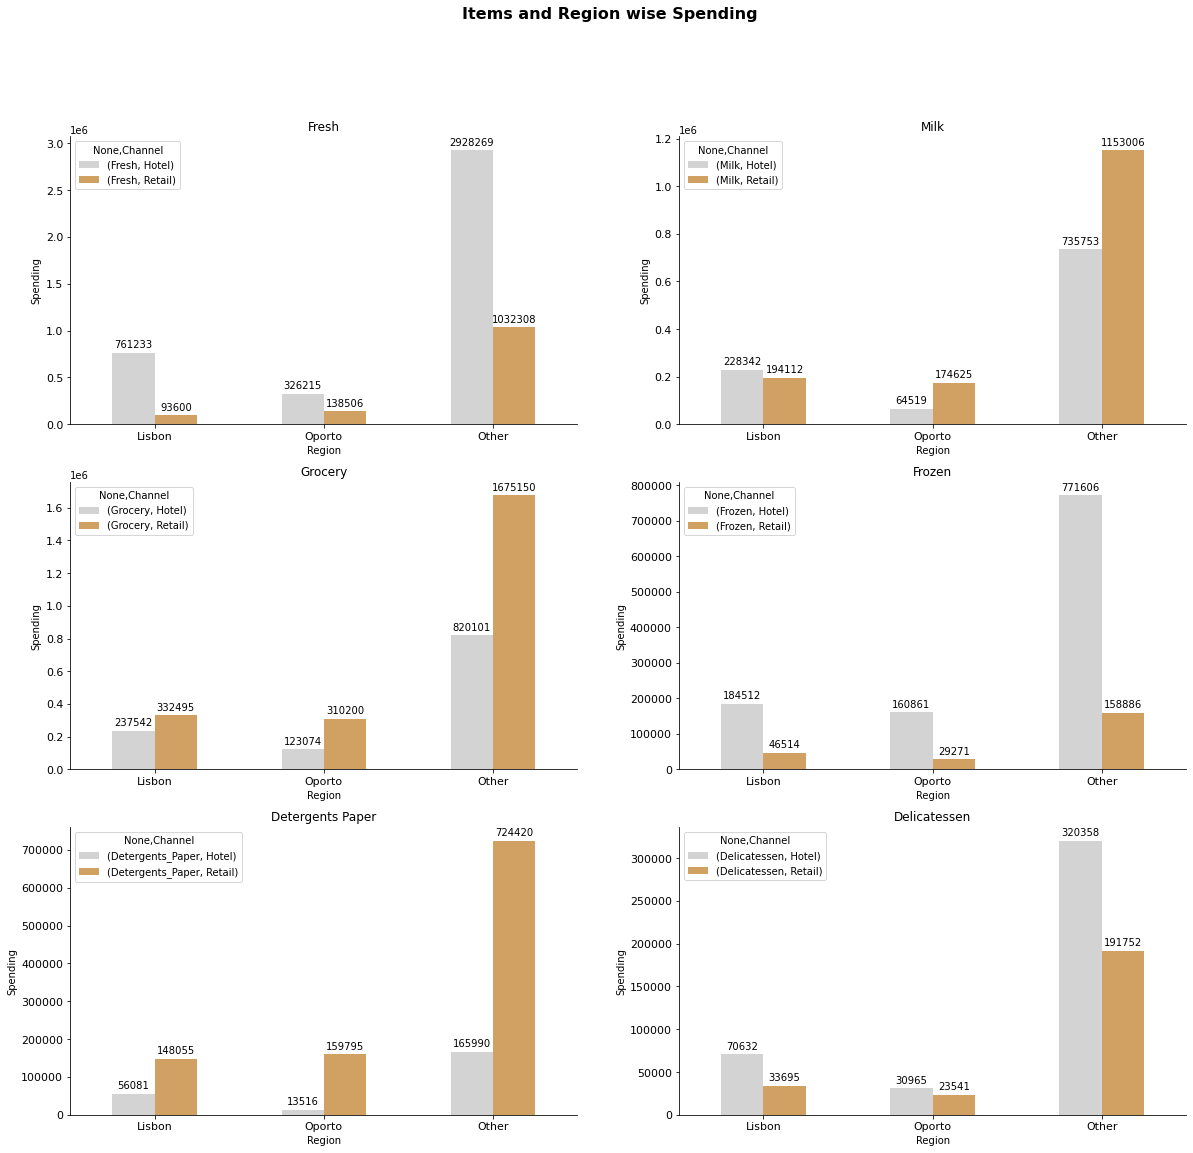

In [22]:
plt1=pd.pivot_table(df,values=['Fresh'],columns=['Channel'], index=['Region'],aggfunc=np.sum)
plt2=pd.pivot_table(df,values=['Milk'],columns=['Channel'], index=['Region'],aggfunc=np.sum)
plt3=pd.pivot_table(df,values=['Grocery'],columns=['Channel'], index=['Region'],aggfunc=np.sum)
plt4=pd.pivot_table(df,values=['Frozen'],columns=['Channel'], index=['Region'],aggfunc=np.sum)
plt5=pd.pivot_table(df,values=['Detergents_Paper'],columns=['Channel'], index=['Region'],aggfunc=np.sum)
plt6=pd.pivot_table(df,values=['Delicatessen'],columns=['Channel'], index=['Region'],aggfunc=np.sum)

n_row=3
n_col=2

df_list = [plt1,plt2,plt3,plt4,plt5,plt6]
title=['Fresh','Milk','Grocery','Frozen','Detergents Paper','Delicatessen']
cmap = sns.set_palette(sns.color_palette(my_colors,as_cmap=True))

fig, axes = plt.subplots(n_row, n_col)
fig.suptitle('Items and Region wise Spending', fontsize=16,fontweight='bold')

i=0

for r in range(n_row):
    for c in range(n_col):
       
        plots=df_list[i].plot(ax=axes[r,c],fontsize=11,figsize=(20,18),kind='bar',rot=0,colormap=cmap,ylabel="Spending",title='{}'.format(title[i]))
        for bar in plots.patches:
            plots.annotate(format(bar.get_height(),'.0f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=10,xytext=(0,8),textcoords='offset pixels')
            plots.spines['top'].set_visible(False)
            plots.spines['right'].set_visible(False)
        
        i+=1


In [23]:
df_des=df_og.describe()
df_des.loc[('CV'),:]=df_des.loc[('std'),:]/df_des.loc[('mean'),:]
df_des

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000
CV,1.053918,1.273299,1.195174,1.580332,1.654647,1.849407,0.793240


In [24]:
cv=df_des.iloc[-1:]
cv

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
CV,1.053918,1.273299,1.195174,1.580332,1.654647,1.849407,0.79324


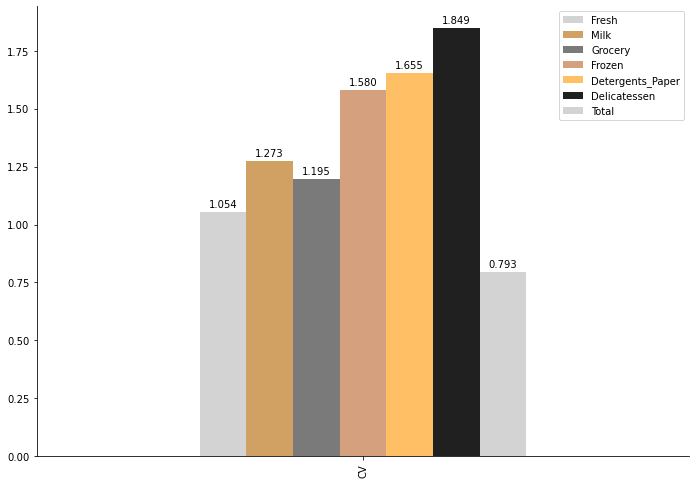

In [25]:
rcParams['figure.figsize'] = 11.7,8.27
plotcv=cv.plot(kind='bar',color=my_colors)
plotcv.spines['top'].set_visible(False)
plotcv.spines['right'].set_visible(False)
for bar in plotcv.patches:
            plotcv.annotate(format(bar.get_height(),'.3f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=10,xytext=(0,8),textcoords='offset pixels')

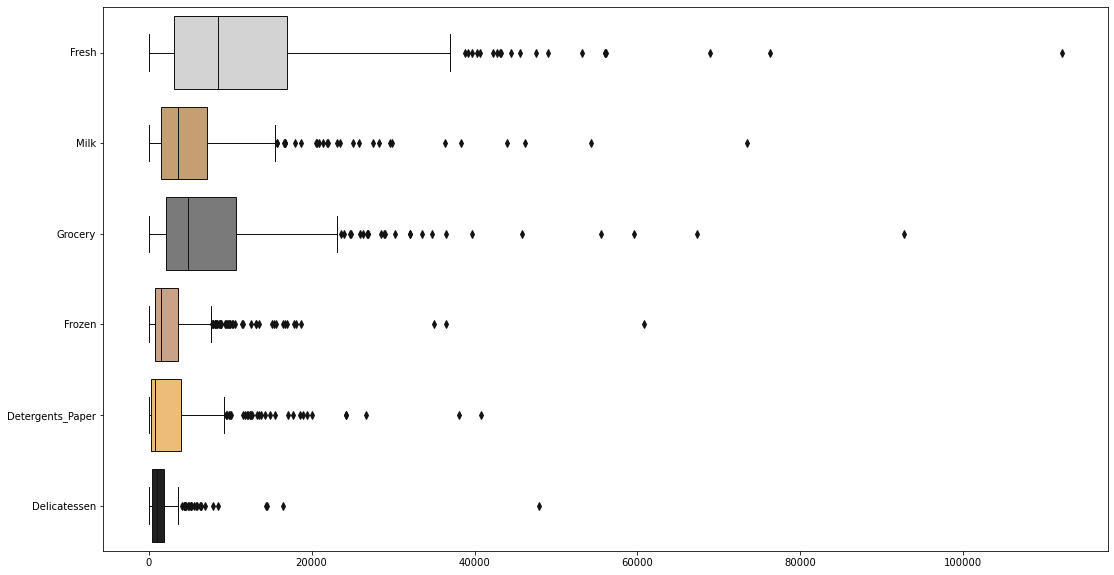

In [26]:

box=df.iloc[:,1:9]
plt.figure(figsize=(18,10))

_=sns.boxplot(linewidth=1,data=box,orient='h',palette=my_colors)

Text(0.0, 1.0, 'CORRELATION MATRIX:\nITEMS\n')

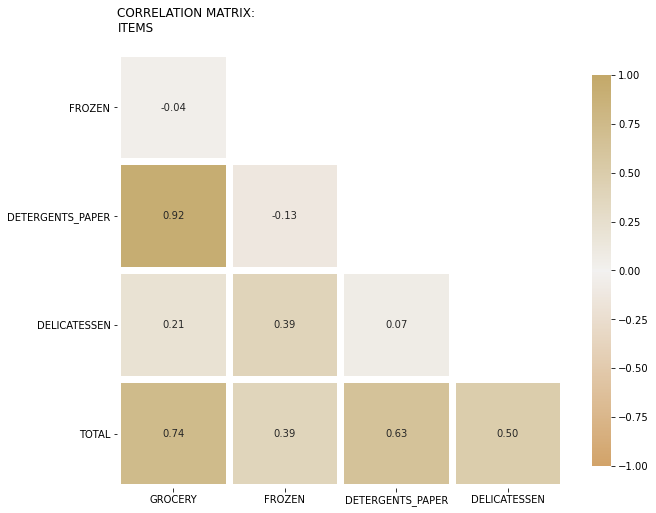

In [27]:
items = df_og[df_og.columns[+2:df_og.columns.size]]
items_corr=items.corr()


fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(items_corr, dtype=bool))
mask = mask[1:, :-1]
corr = items.corr().iloc[1:,:-1].copy()

cmap1 = sns.diverging_palette(51,65, 62,70, as_cmap=True)

_=sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=6, cmap=cmap1, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .9}, square=False)
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
title = 'CORRELATION MATRIX:\nITEMS\n'
plt.title(title, fontsize=12,loc='left')


In [28]:
#2

In [29]:
df1.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [30]:
df1.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [31]:
df1

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [32]:
df1.isnull().sum().any()

False

In [33]:
df1.columns=df1.columns.str.replace(' ','_')

In [34]:
a=pd.crosstab(df1.Gender,df1.Major)
a

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [35]:
cx_grad_intention=pd.crosstab(df1.Gender,df1.Grad_Intention)
cx_grad_intention['Total']=cx_grad_intention.sum(axis=1)
b=cx_grad_intention.drop('Undecided',axis=1)
cx_grad_intention.iloc[:,:-1]

Grad_Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [36]:
c=pd.crosstab(df1.Gender,df1.Employment)
c['Total']=c.sum(axis=1)
c

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29


In [37]:
da=pd.crosstab(df1.Gender,df1.Computer)
d=pd.crosstab(df1.Gender,df1.Computer)
d['Total']=d.sum(axis=1)
d=d.iloc[:1,:]
da

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [38]:
count=df1.Gender.value_counts()
count

Female    33
Male      29
Name: Gender, dtype: int64

In [39]:
count_males=count.iloc[1]
count_females=count.iloc[0]
total_c=count.sum()

In [40]:
probability_males=count_males/total_c
probability_females=count_females/total_c

In [41]:
print("Probability that a randomly selected CMSU student will be male is :", round(probability_males,3))
print("Probability that a randomly selected CMSU student will be female is :", round(probability_females,3))

Probability that a randomly selected CMSU student will be male is : 0.468
Probability that a randomly selected CMSU student will be female is : 0.532


In [42]:
a['Total']=a.iloc[:,:].sum(axis=1)

In [43]:
data={'Accounting':round(a.Accounting/a.Total,3),
      'CIS':round(a.CIS/a.Total,2),
      'Economics/Finance':round(a['Economics/Finance']/a.Total,3),
      'International Business':round(a['International Business']/a.Total,3),
      'Management':round(a.Management/a.Total,3),
      'Other':round(a.Other/a.Total,3),
      'Retailing/Marketing':round(a['Retailing/Marketing']/a.Total,3),
       'Undecided':round(a.Undecided/a.Total,3),
     }

In [44]:
prob_major=pd.DataFrame(data)
prob_major_males=prob_major.iloc[1:,:]
prob_major_males

,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Male,0.138,0.03,0.138,0.069,0.207,0.138,0.172,0.103


In [45]:
prob_major_females=prob_major.iloc[:1,:]
prob_major_females

,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.091,0.09,0.212,0.121,0.121,0.091,0.273,0.0


In [46]:
data1={'Grad Intention - Yes':(round(b.Yes/b.Total,3))}
prob_grad_intention=pd.DataFrame(data1)
prob_grad_intention

,Grad Intention - Yes
Gender,
Female,0.333
Male,0.586


In [47]:
d


Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33


In [48]:
print("Total Females not having laptops : ",int(d.Desktop+d.Tablet))
print("P(Females ∩ Laptops) = P(Female) * P(No Laptops) ")
print("P(Females ∩ Laptops) : ", round((33/62)*(4/62),3))

Total Females not having laptops :  4
P(Females ∩ Laptops) = P(Female) * P(No Laptops) 
P(Females ∩ Laptops) :  0.034


In [49]:
c

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29


In [50]:
data_1={'A':['P(Male)','P(Full time)','P(Male ∩ Full time)'],'B':[round(29/62,3),round(10/62,3),round(7/62,3)]}
Prob_emp = pd.DataFrame(data_1)
Prob_emp

,A,B
0,P(Male),0.468
1,P(Full time),0.161
2,P(Male ∩ Full time),0.113


In [51]:
print('P(Male U Full time) = P(Male) + P(Full time) - P(P(Male ∩ Full time))')
print("P(Male U Full time) : ", 0.468+0.161-0.113,)

P(Male U Full time) = P(Male) + P(Full time) - P(P(Male ∩ Full time))
P(Male U Full time) :  0.516


In [52]:
data_2={'A':['P(Female)','P(International Business or Mgmt)','P(Female ∩ International Business or Mgmt )'],'B':[round(33/62,3),round(16/62,3),round(8/62,3)]}
Prob_b_mgmt = pd.DataFrame(data_2)
Prob_b_mgmt

,A,B
0,P(Female),0.532
1,P(International Business or Mgmt),0.258
2,P(Female ∩ International Business or Mgmt ),0.129


In [53]:
print('P(Female| IB or Mgmt) = P(Female ∩ IB or Mgmt) / P(IB or Mgmt)')
print("P(Female| IB or Mgmt) : ", 0.129/0.258)


P(Female| IB or Mgmt) = P(Female ∩ IB or Mgmt) / P(IB or Mgmt)
P(Female| IB or Mgmt) :  0.5


In [54]:
b.iloc[:,:-1]

Grad_Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [55]:
print("Events are dependent if : \nP(Female ∩ Yes) =  P(Female | Yes) * P(Yes) ie  P(Female)*P(Yes)")
print("")

Events are dependent if : 
P(Female ∩ Yes) =  P(Female | Yes) * P(Yes) ie  P(Female)*P(Yes)



In [56]:
data_3={'A':['P(Female)','P(Yes)','P(Female ∩ Yes)','P(Female)*P(Yes)'],'B':[round(20/40,3),round(28/40,3),round(11/40,3),round((20/40)*(28/40),3)]}
Prob_dpnd = pd.DataFrame(data_3)
Prob_dpnd

,A,B
0,P(Female),0.500
1,P(Yes),0.700
2,P(Female ∩ Yes),0.275
3,P(Female)*P(Yes),0.350


In [57]:
print(" Here we can see that P(Female ∩ Yes) !=  P(Female)*P(Yes), hence events are not dependent")

 Here we can see that P(Female ∩ Yes) !=  P(Female)*P(Yes), hence events are not dependent


In [58]:
df1[df1['GPA']<3].count()


ID                   17
Gender               17
Age                  17
Class                17
Major                17
Grad_Intention       17
GPA                  17
Employment           17
Salary               17
Social_Networking    17
Satisfaction         17
Spending             17
Computer             17
Text_Messages        17
dtype: int64

In [59]:
print('P(GPA < 3): ' , round(17/62,3))

P(GPA < 3):  0.274


In [60]:
###

In [61]:

df1[(df1.Gender=='Male') & (df1.Salary>=50)].count()

ID                   14
Gender               14
Age                  14
Class                14
Major                14
Grad_Intention       14
GPA                  14
Employment           14
Salary               14
Social_Networking    14
Satisfaction         14
Spending             14
Computer             14
Text_Messages        14
dtype: int64

In [62]:
df1.Gender.value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [63]:
df1[df1['Salary']>=50].count()


ID                   32
Gender               32
Age                  32
Class                32
Major                32
Grad_Intention       32
GPA                  32
Employment           32
Salary               32
Social_Networking    32
Satisfaction         32
Spending             32
Computer             32
Text_Messages        32
dtype: int64

In [64]:
data_4={'A':['P(Male)','P(Salary >= 50)','P(Male ∩ Salary >= 50)'],'B':[round(29/62,3),round(32/62,3),round(14/62,3),]}
Prob_sal = pd.DataFrame(data_4)
Prob_sal


,A,B
0,P(Male),0.468
1,P(Salary >= 50),0.516
2,P(Male ∩ Salary >= 50),0.226


In [65]:
print('P(Male) | P(Salary >= 50) = P(Male ∩ Salary >= 50)/P(Salary >= 50)')
print('P(Male) | P(Salary >= 50) : ', round(0.226/0.516,3))

P(Male) | P(Salary >= 50) = P(Male ∩ Salary >= 50)/P(Salary >= 50)
P(Male) | P(Salary >= 50) :  0.438


In [66]:
df1[(df1.Gender=='Female') & (df1.Salary>=50)].count()

ID                   18
Gender               18
Age                  18
Class                18
Major                18
Grad_Intention       18
GPA                  18
Employment           18
Salary               18
Social_Networking    18
Satisfaction         18
Spending             18
Computer             18
Text_Messages        18
dtype: int64

In [67]:
data_5={'A':['P(Female)','P(Salary >= 50)','P(Female ∩ Salary >= 50)'],'B':[round(33/62,3),round(32/62,3),round(18/62,3),]}
Prob_sal_f = pd.DataFrame(data_5)
Prob_sal_f

,A,B
0,P(Female),0.532
1,P(Salary >= 50),0.516
2,P(Female ∩ Salary >= 50),0.290


In [68]:
print('P(Female) | P(Salary >= 50) = P(Female ∩ Salary >= 50)/P(Salary >= 50)')
print('P(Female) | P(Salary >= 50) : ', round(0.290/0.516,3))

P(Female) | P(Salary >= 50) = P(Female ∩ Salary >= 50)/P(Salary >= 50)
P(Female) | P(Salary >= 50) :  0.562


In [69]:
###

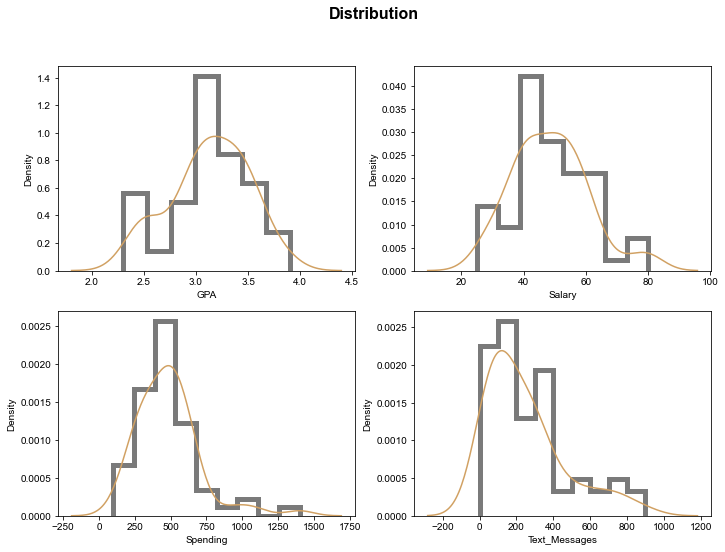

In [70]:
plta=df1['GPA']
pltb=df1['Salary']
pltc=df1['Spending']
pltd=df1['Text_Messages']

n_row1=2
n_col1=2

df_list1 = [plta,pltb,pltc,pltd,]


rcParams['figure.figsize'] = 11.7,8.27
fig, axes = plt.subplots(n_row1, n_col1)


fig.suptitle('Distribution', fontsize=16,fontweight='bold')

a=0

for r in range(n_row1):
    for c in range(n_col1):
        
        plots1=sns.distplot(df_list1[a],ax=axes[r,c],hist_kws={"histtype": "step", "linewidth": 5,"alpha": 1, "color": "#7a7a7a"},kde_kws={"color":"#d1a163"})
       
        a+=1

sns.set_style("whitegrid", {'axes.grid' : False})

In [71]:
#Spending and Text messages are not following normal distribution

In [72]:
m=plta.mean()
n=plta.median()
print('mean : {0}, \nmedian : {1}'.format(m,n))

mean : 3.129032258064516, 
median : 3.1500000000000004


In [73]:
o=pltb.mean()
p=pltb.median()
print('mean : {0}, \nmedian : {1}'.format(o,p))

mean : 48.54838709677419, 
median : 50.0


In [74]:
q=pltc.mean()
qr=pltc.median()
print('mean : {0}, \nmedian : {1}'.format(q,qr))

mean : 482.01612903225805, 
median : 500.0


In [75]:
s=pltd.mean()
sr=pltd.median()
print('mean : {0}, \nmedian : {1}'.format(s,sr))

mean : 246.20967741935485, 
median : 200.0


In [76]:
#3

In [77]:
t_statistic,p_value = ttest_1samp(df2.A,0.35)
print('t_statistic : {0}, \np value : {1}'.format(t_statistic,p_value/2))


t_statistic : -1.4735046253382782, 
p value : 0.07477633144907513


In [78]:
t_statistic,p_value = ttest_1samp(df2.B,0.35,nan_policy='omit')
print('t_statistic : {0}, \np value : {1}'.format(t_statistic,p_value/2))

t_statistic : -3.1003313069986995, 
p value : 0.0020904774003191826


In [79]:
t_statistic,p_value = ttest_ind(df2.A,df2.B,nan_policy='omit',equal_var=True,)
print('t_statistic : {0}, \np value : {1}'.format(t_statistic,p_value))

t_statistic : 1.2896282719661123, 
p value : 0.2017496571835306
